# Feel empty values
At the first stage, data is loaded, analyzed and processed



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Data import

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
df_start = pd.read_excel('drive/MyDrive/.../31.xlsx')

In [ ]:
df_resistance = pd.DataFrame({'resistance': df_start['resistance']})

In [ ]:
df_pois = pd.DataFrame({'poisson': df_start['poisson']})

Approxiamation

In [ ]:
df = df_start
df = df.drop(columns = ['matrix','filler','concentration','resistance','poisson','doi','n','poisson'])
df.columns = df.columns.str.replace('%','')

In [ ]:
df.head()

,0.4,0.8,1.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,100.0
0,NaN,NaN,1.500000e-01,2.000000e-01,3.000000e-01,0.5,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.306995,0.612394,9.524391e-01,1.112329e+01,1.212294e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,6.84,11.4,NaN,30.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.140000e+06,1.280000e+06,2.000000e+06,2500000.0,3800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.110000e+04,1.250000e+04,1.670000e+04,18900.0,24400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating an empty dataframe with two parameters **a, b**

In [ ]:
df_new = pd.DataFrame(columns = ['a_optimal','b_optimal'])

Construction of an approximation curve in accordance with the expression obtained in the Work in accordance with Boltzmann statistics, using the scipy library. Filling the **a_optimal, b_optimal** columns in the *df_new* dataframe




In [ ]:
def approximation(j):
  df_united = df.loc[[j]]
  df_united = df_united.dropna(axis = 1)
  x = np.array(df_united.columns.to_numpy())
  x = x.astype(float)
  y = df_united.iloc[0].to_numpy()
  def sinh_function(x, a, b):
    return df_resistance['resistance'][j] * (1 + abs(a) * x * np.cosh(b * df_pois['poisson'][j] * x ))
  params, covariance = curve_fit(sinh_function, x, y)

  a_optimal, b_optimal = params

  df_new.loc[j, 'a_optimal'] = a_optimal
  df_new.loc[j, 'b_optimal'] = b_optimal

  # Постройте график данных и аппроксимации
  import matplotlib.pyplot as plt

  x_new = np.linspace(min(x), max(x), 100)
  y_new = sinh_function(x_new, a_optimal, b_optimal)

  plt.plot(x, y, 'ro', label='Experiment')
  plt.plot(x_new, y_new, 'b-', label=f'Approximation {j}')
  plt.xlabel('elogation')
  plt.ylabel('resistivity')
  plt.title(f'Approximation y = resistance (1 +a * x * cosh(b * x)), a_optimal = {a_optimal}, b_optimal = {b_optimal}')
  plt.legend()
  plt.savefig(f'experiment_number_{j}.png')
  plt.show()

  for i in range(df.shape[1]):
    if pd.isna(df.iloc[:,i][j]):
      df.iloc[:,i][j]  = df_resistance['resistance'][j] (1 + abs(a_optimal) * np.cosh((float(np.array(df.columns.to_numpy())[i])) * df_pois['poisson'][j]) * b_optimal)

  x_for_plot = x
  y_for_plot = sinh_function(x_for_plot, a_optimal, b_optimal)
  plt.plot(x_for_plot, y_new, 'b-', label=f'Approximation of experiment № {j}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Graphs to 10%')
  plt.legend()
  plt.savefig(f'experiment_number_{j}.png')
  plt.show()


  print(f'Оптимальное значение a: {a_optimal}')
  print(f'Оптимальное значение b: {b_optimal}')




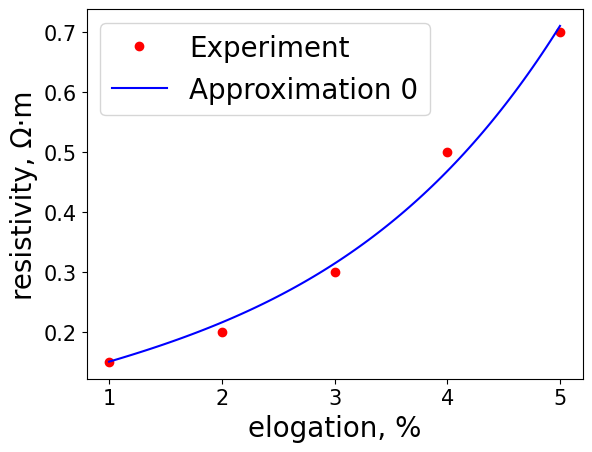

Iteration error 0: 'numpy.float64' object is not callable


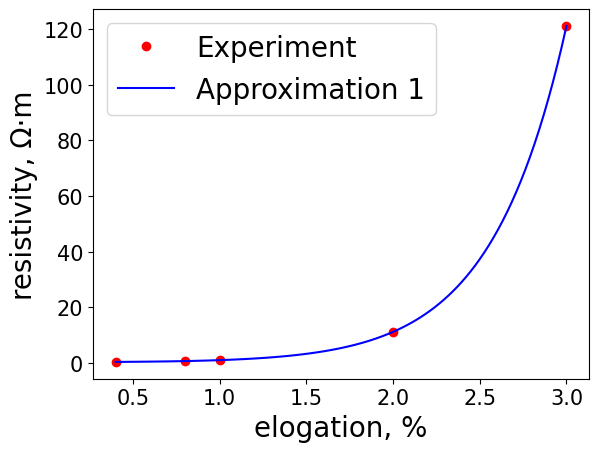

Iteration error 1: 'numpy.float64' object is not callable


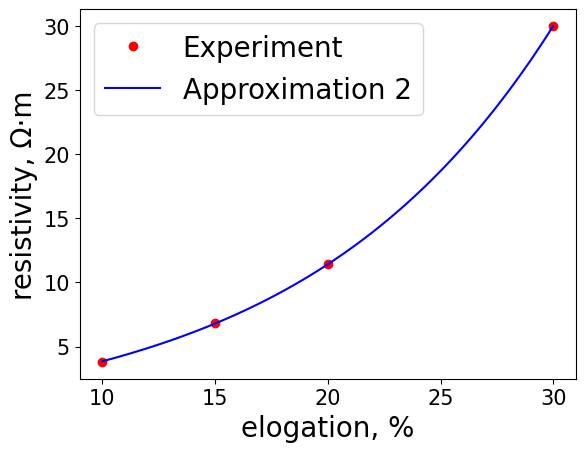

Iteration error 2: 'numpy.float64' object is not callable


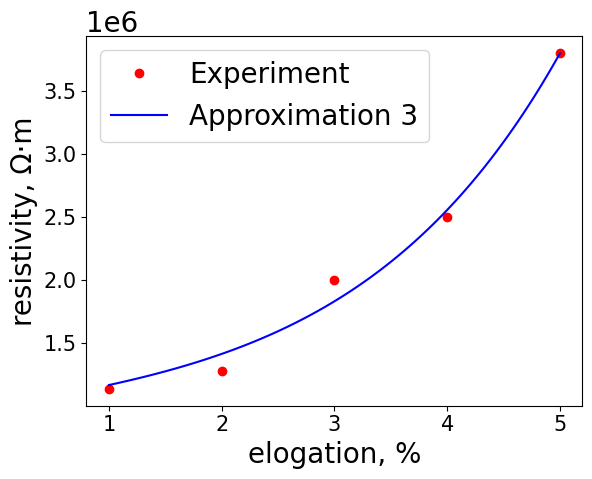

Iteration error 3: 'numpy.float64' object is not callable


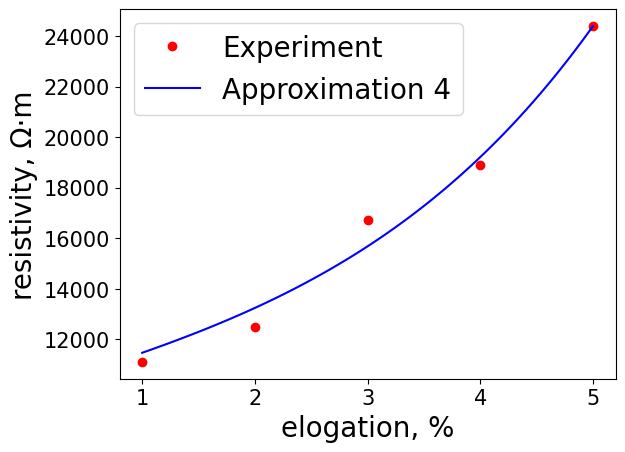

Iteration error 4: 'numpy.float64' object is not callable


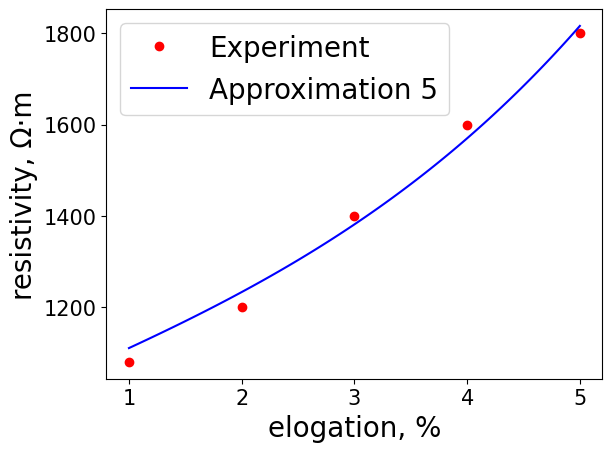

Iteration error 5: 'numpy.float64' object is not callable


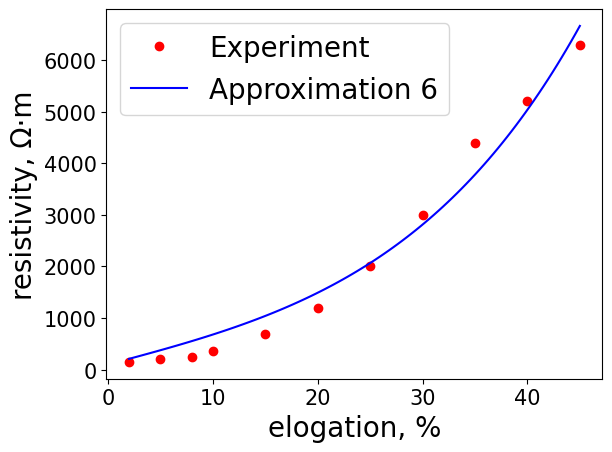

Iteration error 6: 'numpy.float64' object is not callable


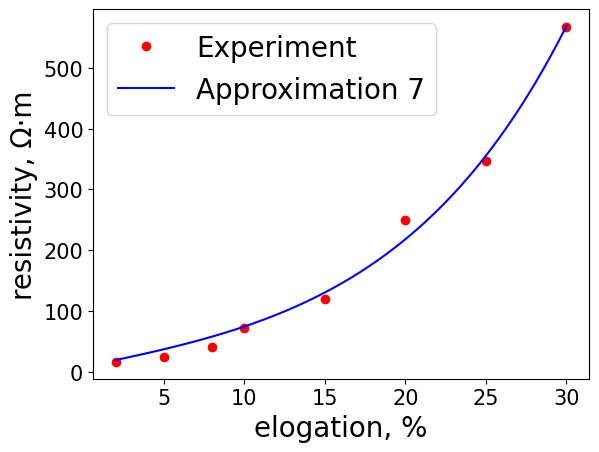

Iteration error 7: 'numpy.float64' object is not callable


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


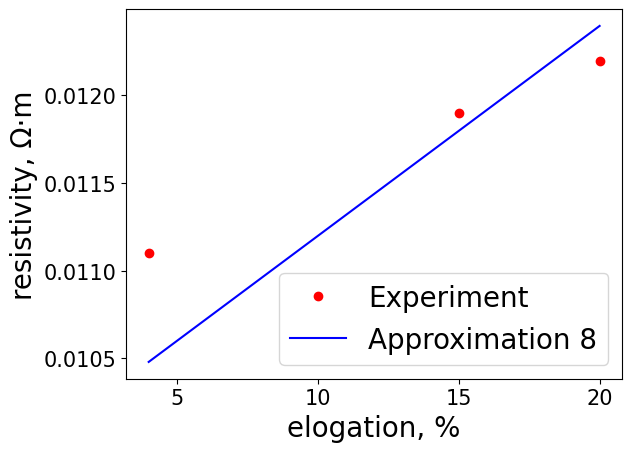

Iteration error 8: 'numpy.float64' object is not callable


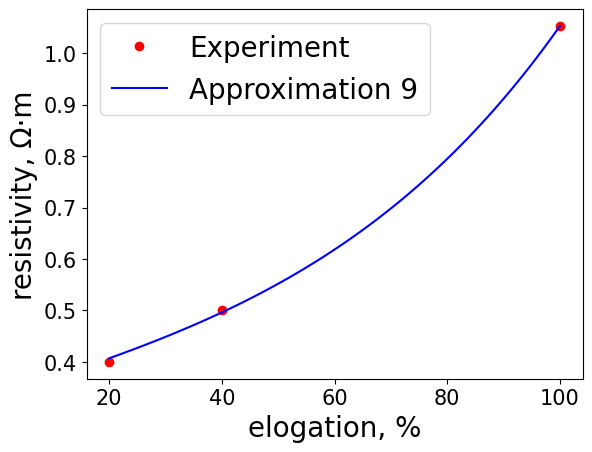

Iteration error 9: 'numpy.float64' object is not callable


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


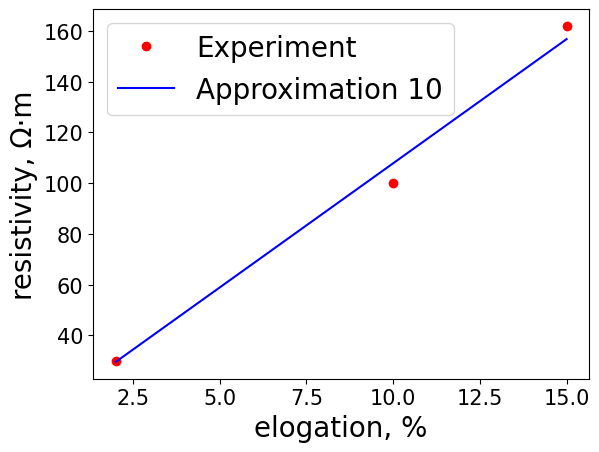

Iteration error 10: 'numpy.float64' object is not callable


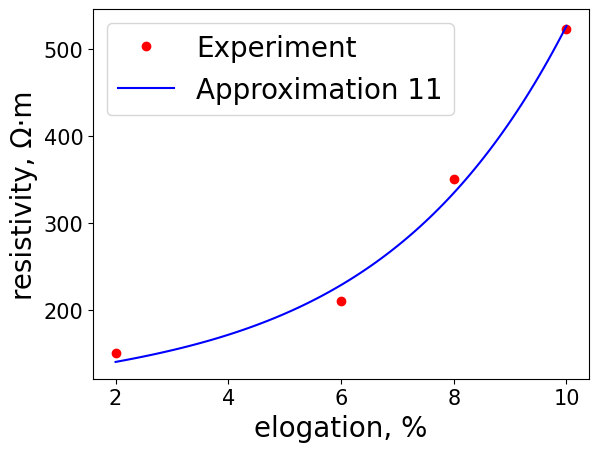

Iteration error 11: 'numpy.float64' object is not callable


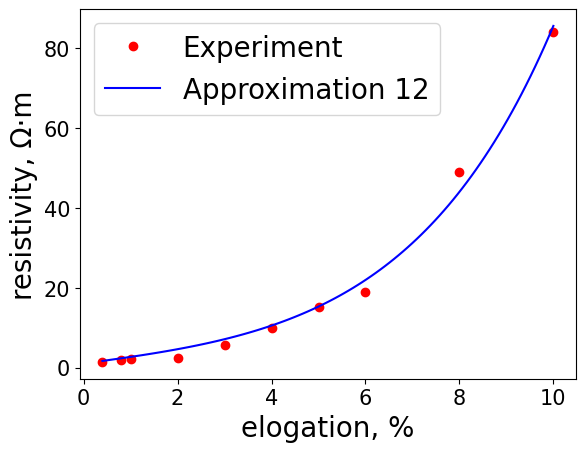

Iteration error 12: 'numpy.float64' object is not callable


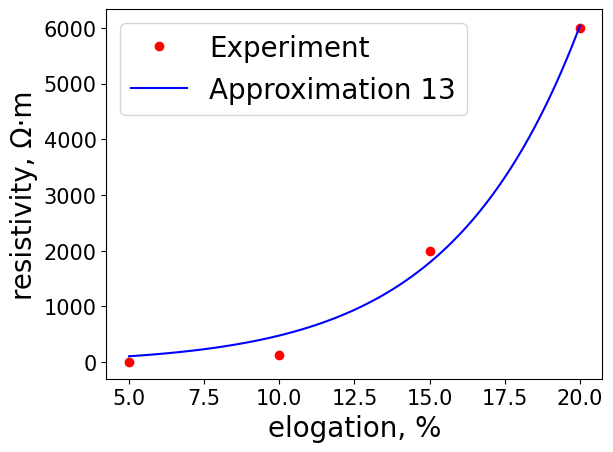

Iteration error 13: 'numpy.float64' object is not callable


In [ ]:
for i in range(df.shape[0]):
  try:
    approximation(i)
  except Exception as e:
    print(f"Iteration error {i}: {e}")


**a_optimal, b_optimal** columns

In [ ]:
df_new

,a_optimal,b_optimal
0,0.479626,0.962043
1,1.0,4.0
2,0.75463,0.181688
3,0.158764,1.170543
4,0.141132,0.812202
5,0.108285,0.587308
6,0.543873,0.072998
7,0.687368,0.126338
8,0.011981,-0.000004
9,0.010667,0.038011


In [ ]:
df_new = df_new.astype(float)

safe a and b

In [ ]:
result = pd.concat([df, df_new], axis =1)

In [ ]:
df_start.head()

,n,matrix,filler,concentration,resistance,poisson_before,poisson,0.4%,0.8%,1.0%,...,15.0%,20.0%,25.0%,30.0%,35.0%,40.0%,45.0%,50.0%,100.0%,doi
0,0,PEO,CNT,3.0,0.10,0.33,0.2,NaN,NaN,1.500000e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1142/S1758825115400050
1,1,rubber,CB,20.0,0.20,0.50,1.9,0.306995,0.612394,9.524391e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Старье
2,2,EVA,SCF,50.0,0.38,0.35,0.1,NaN,NaN,NaN,...,6.84,11.4,NaN,30.0,NaN,NaN,NaN,NaN,NaN,10/1002/pi.811
3,3,PEO,CNT,1.0,1000000.00,0.33,0.1,NaN,NaN,1.140000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/1088/0022-3727/47/40/405103
4,4,PEO,CNT,2.0,10000.00,0.33,0.1,NaN,NaN,1.110000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/1088/0022-3727/47/40/405103


Removing uninformative columns

In [ ]:
result = pd.concat([result, df_start[['resistance','poisson','concentration']]], axis = 1)

In [ ]:
result

,0.4,0.8,1.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,...,40.0,45.0,50.0,100.0,a_optimal,b_optimal,resistance,poisson,poisson_before,concentration
0,NaN,NaN,1.500000e-01,2.000000e-01,3.000000e-01,5.000000e-01,7.000000e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.479626,0.962043,0.100000,0.20,0.33,3.0
1,0.306995,0.612394,9.524391e-01,1.112329e+01,1.212294e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,4.000000,0.200000,1.90,0.50,20.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,...,NaN,NaN,NaN,NaN,0.754630,0.181688,0.380000,0.10,0.35,50.0
3,NaN,NaN,1.140000e+06,1.280000e+06,2.000000e+06,2.500000e+06,3.800000e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.158764,1.170543,1000000.000000,0.10,0.33,1.0
4,NaN,NaN,1.110000e+04,1.250000e+04,1.670000e+04,1.890000e+04,2.440000e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.141132,0.812202,10000.000000,0.10,0.33,2.0
5,NaN,NaN,1.080000e+03,1.200000e+03,1.400000e+03,1.600000e+03,1.800000e+03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.108285,0.587308,1000.000000,0.10,0.33,3.0
6,NaN,NaN,NaN,1.500000e+02,NaN,NaN,2.000000e+02,NaN,250.0,360.0,...,5200.0,6300.0,NaN,NaN,0.543873,0.072998,100.000000,0.05,0.50,20.0
7,NaN,NaN,NaN,1.600000e+01,NaN,NaN,2.400000e+01,NaN,40.0,72.0,...,NaN,NaN,NaN,NaN,0.687368,0.126338,8.000000,0.05,0.50,40.0
8,NaN,NaN,NaN,NaN,NaN,1.110000e-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.011981,-0.000004,0.010000,0.10,0.31,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,1.052632,0.010667,0.038011,0.333333,NaN,0.35,15.0


In [ ]:
result['poisson'] = pd.to_numeric(result['poisson'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.4     2 non-null      float64
 1   0.8     2 non-null      float64
 2   1.0     6 non-null      float64
 3   2.0     10 non-null     float64
 4   3.0     6 non-null      float64
 5   4.0     6 non-null      float64
 6   5.0     8 non-null      float64
 7   6.0     2 non-null      float64
 8   8.0     4 non-null      float64
 9   10.0    7 non-null      float64
 10  15.0    6 non-null      float64
 11  20.0    6 non-null      float64
 12  25.0    2 non-null      float64
 13  30.0    3 non-null      float64
 14  35.0    1 non-null      float64
 15  40.0    2 non-null      float64
 16  45.0    1 non-null      float64
 17  50.0    0 non-null      float64
 18  100.0   1 non-null      float64
dtypes: float64(19)
memory usage: 2.2 KB


In [ ]:
df_final = result

# CatBoost for b prediction

In [ ]:
import seaborn as sns

corrlation matrix

for poisson are consentration и b_optimal

the best metrics are consentration и a_optimal

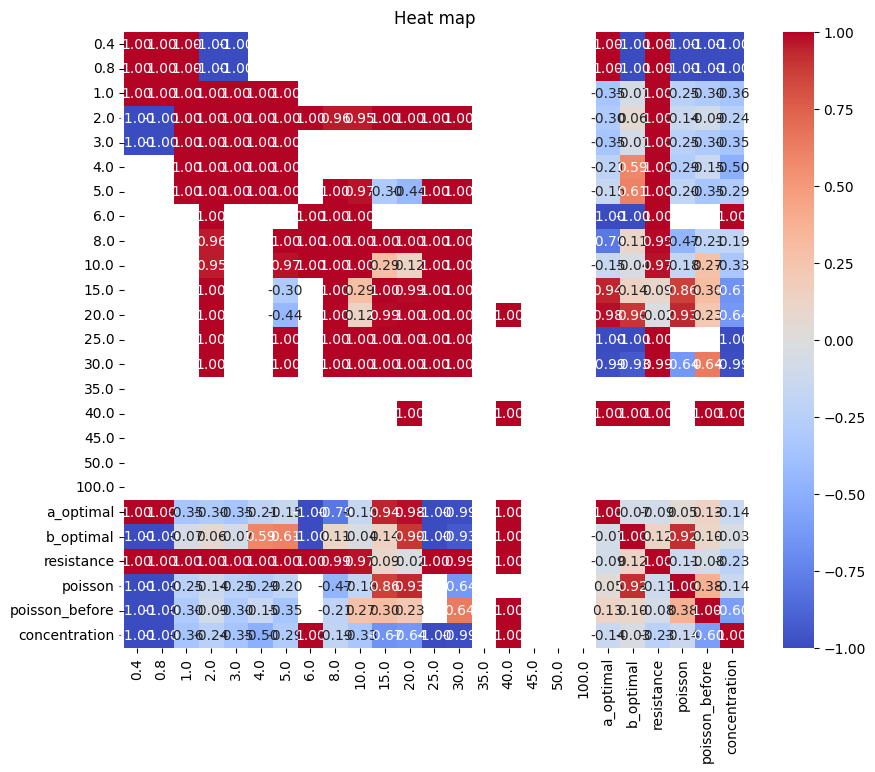

In [ ]:
correlation_matrix = df_final.corr()

# Создайте тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map')
plt.show()


Machine learning catboost


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import catboost as cb

In [ ]:
df_final.head(24)

In [ ]:
df_final.info()

In [ ]:
df_learn = df_final[['b_optimal', 'concentration','resistance', 'poisson']]

In [ ]:
df_learn = df_learn.dropna()

In [ ]:
X, y = df_learn.drop(columns = ['b_optimal']), df_learn['b_optimal']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 999)

train_pool = cb.Pool(X_train, y_train)
test_pool = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='MAE',eval_metric = 'MAE', iterations = 5000)

In [ ]:
pred = model.fit(train_pool, use_best_model=True, eval_set=test_pool)
pred = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print('rmse = ', rmse)
print('r2 = ', r2)
print('mae = ', mae)

In [ ]:
df_learn['b_optimal'].mean()

0.8052996890745299

MAPE

In [ ]:
mae/df_learn['b_optimal'].mean()

0.15040300026990922

Feature importance

([<matplotlib.axis.YTick at 0x7f1275ac2ec0>,
 [Text(0, 0, 'resistance'),
  Text(0, 1, 'concentration'),
  Text(0, 2, 'poisson_before')])

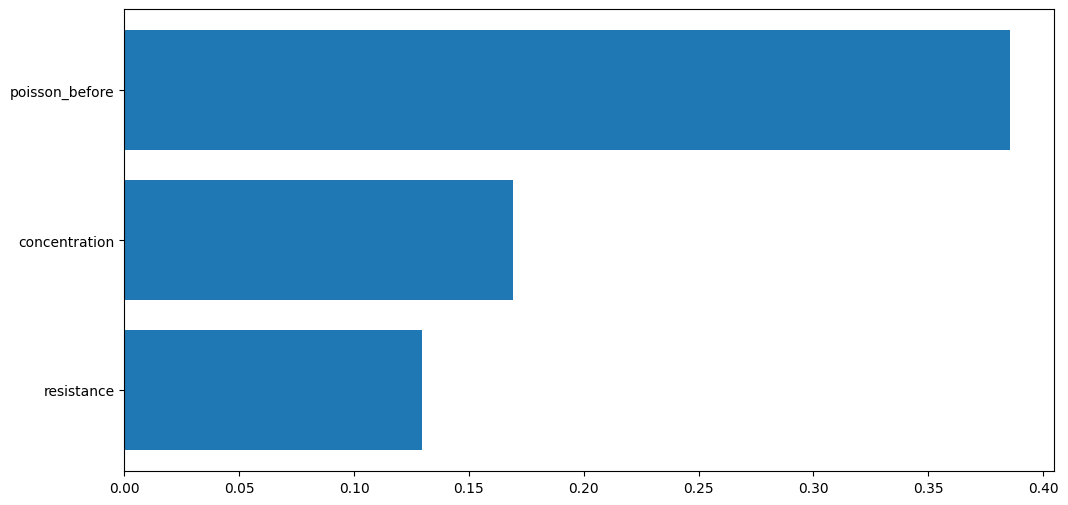

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])


Catboost tree

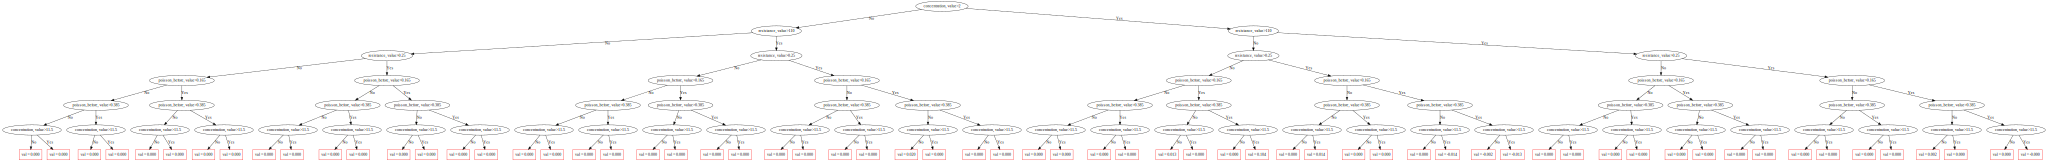

In [ ]:
model.plot_tree(
    tree_idx=0,
    pool=train_pool
)

In [ ]:
import pickle

In [ ]:
pkl_filename = "drive/MyDrive/.../model_b.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(model, file)


# а prediction


the same technology

In [ ]:
df_learn_ = df_final[['poisson', 'concentration','resistance', 'a_optimal']]
df_learn_a = df_learn_.dropna()
df_learn_a

In [ ]:
XX, yy = df_learn_a.drop(columns = ['a_optimal']), df_learn_a['a_optimal']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(XX, yy, train_size = 0.8, shuffle = True, random_state = 999)

train_pool_a = cb.Pool(X_train_a, y_train_a)
test_pool_a = cb.Pool(X_test_a, y_test_a)

In [ ]:
model_a = cb.CatBoostRegressor(loss_function='MAE',eval_metric = 'MAE', iterations = 5000)

pred_a = model_a.fit(train_pool_a, use_best_model=True, eval_set=test_pool_a)
pred_a = model_a.predict(X_test_a)

rmse = (np.sqrt(mean_squared_error(y_test_a, pred_a)))
r2 = r2_score(y_test_a, pred_a)
mae = mean_absolute_error(y_test_a, pred_a)

print('rmse = ', rmse)
print('r2 = ', r2)
print('mae = ', mae)

In [ ]:
mae/df_learn_a['a_optimal'].mean()

0.054708749636502414

In [ ]:
pkl_filename = "drive/MyDrive/.../model_a.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(model_a, file)


# Predict!

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pickle
import catboost as cb

In [ ]:
data_new = pd.DataFrame()

print('Enter the name of the sample:')
data_new.loc[0, "sample's name"]= input()
print('Enter filler concentration, %')
data_new.loc[0,'concentration'] = input()
print('Enter the resistance at the previously specified concentration, Ohm m')
data_new.loc[0, 'resistance']  = input()
print('Enter filler poisson ratio for the matrix')
data_new.loc[0,'poisson'] = input()
print('Enter the desired elongation during stretching , %')
data_new.loc[0, 'elongation'] = input()
print('Set the elongation range as a percentage for visualization')
print('From:  ')
data_new.loc[0, 'diap1'] = input()
print('to:  ')
data_new.loc[0, 'diap2'] = input()


In [ ]:
# Load from file
pkl_filename_b = "drive/MyDrive/.../model_b.pkl"
with open(pkl_filename_b, 'rb') as file:
  pickle_model_b = pickle.load(file)

# Load from file
pkl_filename_a = "drive/MyDrive/.../model_a.pkl"
with open(pkl_filename_a, 'rb') as file:
  pickle_model_a = pickle.load(file)

In [ ]:
dfff = data_new[['concentration', 'resistance', 'poisson']]

poisson_pred = pickle_model_b.predict(dfff)

a = np.array(pickle_model_a.predict(dfff), float)


In [ ]:
print (a,poisson_pred)

[0.41896335] [0.12435565]


In [ ]:
predic = np.array( data_new.iloc[0, 2], float) * (1 + a * np.array( data_new.iloc[0, 4], float) * np.cosh(poisson_pred * np.array( data_new.iloc[0, 2], float)))

Text(0.5, 1.0, 'Dependence of resistivity on deformation')

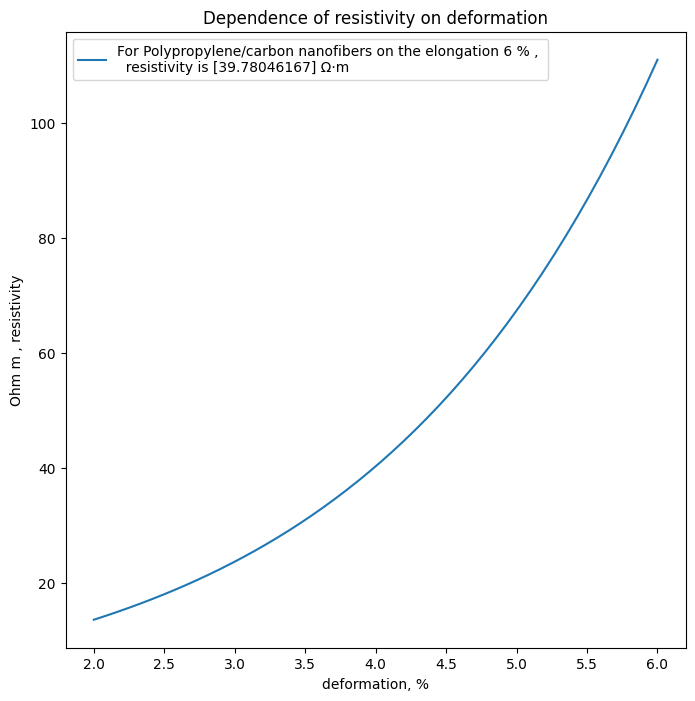

In [ ]:
x_ =  np.linspace(np.array( data_new.iloc[0, 4], float), np.array( data_new.iloc[0, 5], float), 50)

res = np.array( data_new.iloc[0, 2], float)

y_ = res * (1 + a * x_ * np.cosh(poisson_pred * x_))
#y =

fig, ax = plt.subplots()

ax.plot(x_, y_, label = 'For ' + str(data_new.iloc[0, 0]) + ' on the elongation ' + str( data_new.iloc[0, 4])  + ' % , \n  resistivity is ' + np.array_str(predic) +' Ω·m')

#ax.set_yscale('log', base=10)

ax.legend(fontsize = 10,
          loc = 'upper left',
          ncol = 1

         )

fig.set_figwidth(8)
fig.set_figheight(8)

plt.xlabel('deformation, %')
plt.ylabel("Ohm m , resistivity")
plt.title('Dependence of resistivity on deformation')